In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math

dataDir = "c:/Users/llave/Documents/CMS/data/electron_selection_compressed/"

In [2]:
nEMax0 = 0
e_max = np.zeros((40,40))
centerEnergy_e=[]
for file in os.listdir(dataDir):
    if("e_0p25"in file and ".npz" in file):
        
        # load images from file
        temp = np.load(dataDir+file)
        if(len(temp['images'])>0): e_images = temp['images']
        
        # reshape images
        e_images = e_images[:,1:]
        if(e_images.shape[1] != 6400):
            print(file)
            continue
        e_images = np.reshape(e_images,(e_images.shape[0],40,40,4))
        e_images = e_images[:,:,:,0]
        
        # store indices for max of each ECAL image
        for img in e_images:
            temp=0
            for i in range(15,25+1):
                for j in range(15,25+1):
                    temp+=img[i,j]
            centerEnergy_e.append(temp)

e_0p25_1131.npz
e_0p25_17.npz
e_0p25_2222.npz
e_0p25_2893.npz
e_0p25_87.npz


In [3]:
nSaved = 0
nBkgMax0 = 0
bkg_max = np.zeros((40,40))
centerEnergy_bkg=[]
for file in os.listdir(dataDir):
    if("bkg_"in file and ".npz" in file):
        
        # load images from file
        temp = np.load(dataDir+file)
        if(len(temp['images'])>0): bkg_images = temp['images']
            
        # reshape images
        bkg_images = bkg_images[:,1:]
        bkg_images = np.reshape(bkg_images,(bkg_images.shape[0],40,40,4))
        bkg_images = bkg_images[:,:,:,0]
        
        # store indices for max of each ECAL image
        for img in bkg_images:
            temp=0
            for i in range(15,25+1):
                for j in range(15,25+1):
                    temp+=img[i,j]
            centerEnergy_bkg.append(temp)
        
        nSaved += 1
        if(nSaved%50==0):print(nSaved)
        if(nSaved == 500): break

50
100
150
200
250
300
350
400
450
500


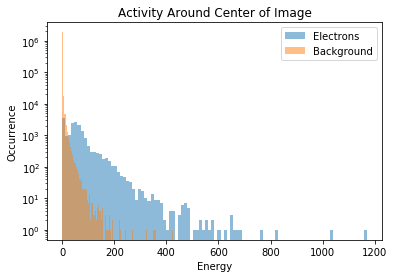

In [4]:
plt.hist(centerEnergy_e, label="Electrons", alpha=0.5, bins=100)
plt.hist(centerEnergy_bkg, label="Background", alpha=0.5, bins=100)
plt.title("Activity Around Center of Image")
plt.ylabel("Occurrence")
plt.xlabel("Energy")
plt.yscale('log')
plt.legend()
plt.show()

In [14]:
veti = [0,1,5,10,20,30,40,50,70,90,120,130,150,200]
bkg_failVeto,bkg_passVeto=np.zeros(len(veti)), np.zeros(len(veti))
e_failVeto,e_passVeto=np.zeros(len(veti)), np.zeros(len(veti))
for i,veto in enumerate(veti):

    for event in centerEnergy_bkg: 
        if(event < veto): bkg_failVeto[i]+=1
        else: bkg_passVeto[i]+=1
            
    for event in centerEnergy_e: 
        if(event < veto): e_failVeto[i]+=1
        else: e_passVeto[i]+=1

In [15]:
f_bkg_failVeto = bkg_failVeto/len(centerEnergy_bkg)
f_bkg_passVeto = bkg_passVeto/len(centerEnergy_bkg)
f_e_failVeto = e_failVeto/len(centerEnergy_e)
f_e_passVeto = e_passVeto/len(centerEnergy_e)

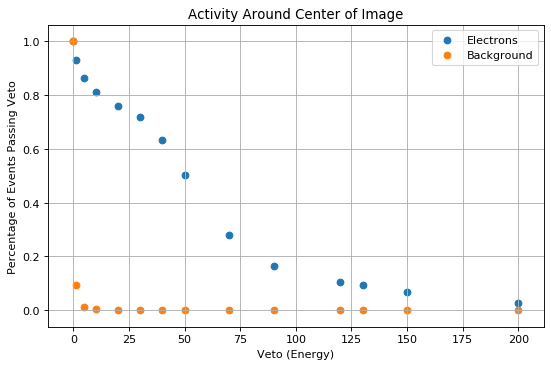

In [16]:
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(veti, f_e_passVeto, label="Electrons")
plt.scatter(veti, f_bkg_passVeto, label="Background")
plt.title("Activity Around Center of Image")
plt.ylabel("Percentage of Events Passing Veto")
plt.xlabel("Veto (Energy)")
plt.grid()
plt.legend()
plt.show()

In [20]:
print(veti[1], f_e_passVeto[1], f_bkg_passVeto[1])

1 0.9321119478475891 0.0945207035863669
